only run this part once so your environment gets the right packages

In [ ]:
!pip install dash
!pip install factor_analyzer

# data read in

In [ ]:
import pandas as pd

# Replace 'OUT-update.xlsx' with the path to your XLSX file and 'output.csv' with the desired CSV file name.
input_xlsx = 'OUT-update.xlsx'
output_csv = 'output.csv'

# Read the XLSX file into a DataFrame
df = pd.read_excel(input_xlsx)

# Save the DataFrame as a CSV file
df.to_csv(output_csv, index=False)  # Set index=False to exclude row numbers

In [ ]:
# Remove the first 10 columns (assuming you want to keep columns 11 and onwards)
df = df.iloc[:, 10:]

# correlation matrix

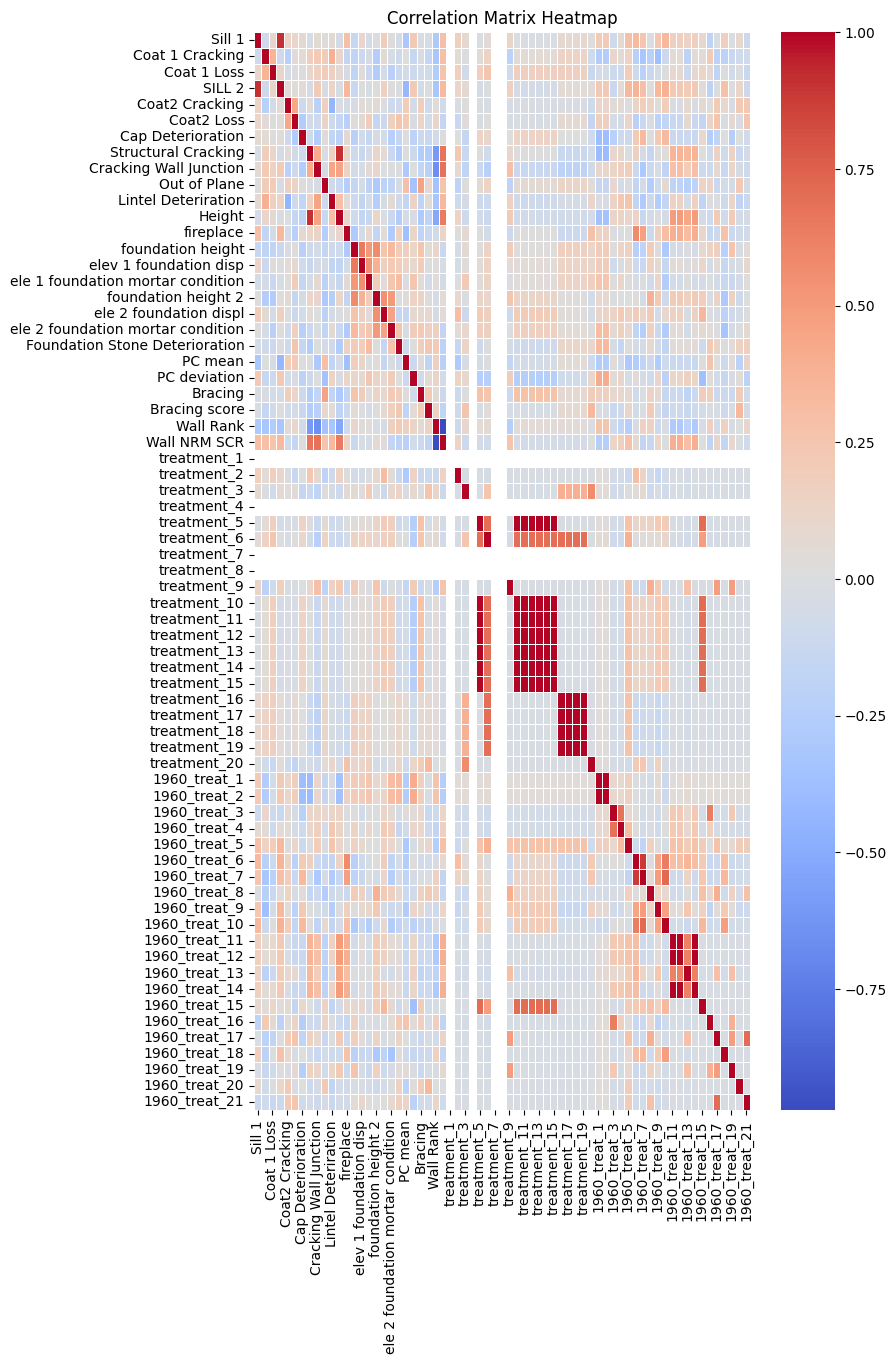

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

since you might want to look at a subset of the correlation matrix, i wrote this webapp that will allow you to pick the columns you want to interogate. run it (and wait since it takes a bit) and then you will see where you pick the columns. it will look something like this:

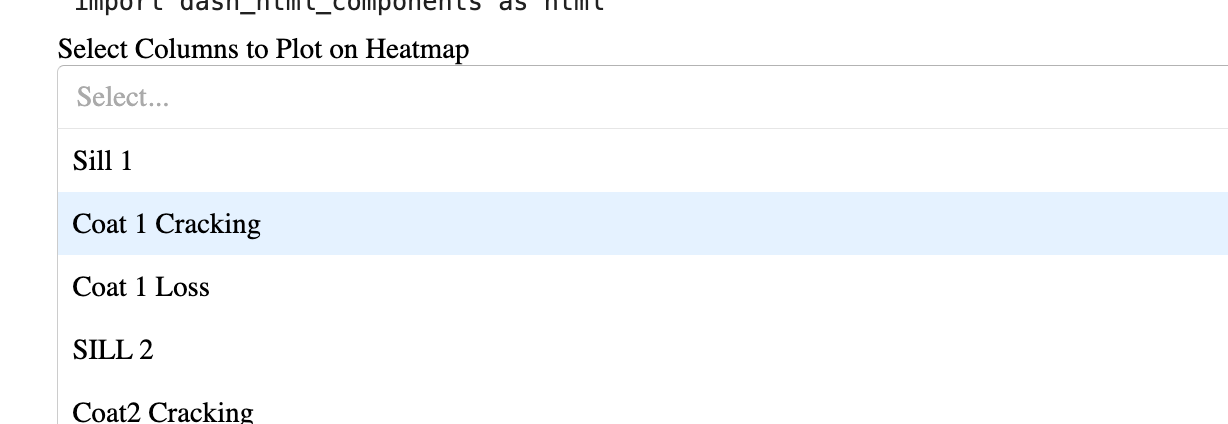

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize the Dash web application
app = dash.Dash(__name__)

# Define the layout of the web application
app.layout = html.Div([
    html.Label("Select Columns to Plot on Heatmap"),
    dcc.Dropdown(
        id='column-selector',
        options=[{'label': col, 'value': col} for col in df.columns],
        multi=True
    ),
    dcc.Graph(id='heatmap')
])

# Define callback to update the heatmap based on user's selection
@app.callback(
    Output('heatmap', 'figure'),
    Input('column-selector', 'value')
)
def update_heatmap(selected_columns):
    if selected_columns:
        # Filter the DataFrame to include selected columns
        selected_df = df[selected_columns]

        # Calculate the correlation matrix
        correlation_matrix = selected_df.corr()

        # Create the heatmap using Plotly Express
        fig = px.imshow(correlation_matrix, x=selected_columns, y=selected_columns)
        fig.update_layout(title="Correlation Matrix Heatmap")

        return fig
    else:
        # If no columns are selected, display an empty heatmap
        return {}

# Run the Dash web application
if __name__ == '__main__':
    app.run_server(debug=True)

<ipython-input-5-a271227ca620>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-5-a271227ca620>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

# principal component analysis

## What is pca and why do we do it?

Principal Component Analysis (PCA) is a widely-used dimensionality reduction technique. Its primary purpose is to simplify complex datasets by transforming the original features into a new set of uncorrelated variables known as principal components. PCA achieves this goal by retaining the most essential information while reducing the number of dimensions. This reduction in dimensionality offers several advantages. It helps in managing high-dimensional data, making the analysis more efficient and improving the performance of machine learning algorithms and it can remove noise and irrelevant information, focusing on the most significant patterns and variations in the data.

## so what is the dif between this and correlation analysis?
* pca is chiefly used for dimensionality reduction and data transformation, aiming to find uncorrelated variables called principal components while capturing the maximum variance in the data. The result is a reduced-dimensional representation of the data.

* correlation analysis focuses on quantifying the linear relationships between pairs of variables, providing insights into how they co-vary. It calculates correlation coefficients that indicate the strength and direction of the linear relationships but does not inherently reduce the dimensionality of the data.


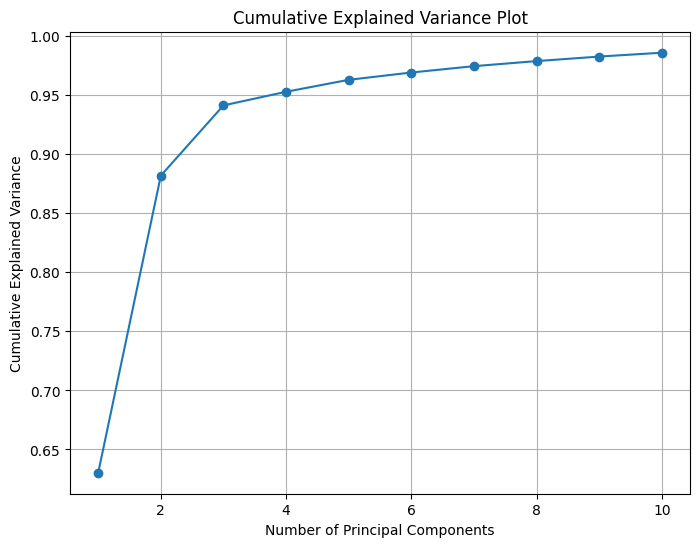

In [ ]:
# Import the necessary library for PCA
from sklearn.decomposition import PCA

# Create an instance of the PCA class and specify the number of principal components you want to keep
pca = PCA(n_components=10)  # Retain 10 principal components

# Fit the PCA model to your data and transform the data into a reduced-dimensional space
components = pca.fit_transform(df)  # 'components' now contains the reduced-dimensional data

# Calculate the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Create a plot to visualize the cumulative explained variance
import matplotlib.pyplot as plt  # Import the plotting library
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
# Plot the cumulative explained variance, x-axis: number of components, y-axis: cumulative explained variance
plt.xlabel('Number of Principal Components')  # Label for x-axis
plt.ylabel('Cumulative Explained Variance')  # Label for y-axis
plt.title('Cumulative Explained Variance Plot')  # Title of the plot
plt.grid(True)  # Display gridlines
plt.show()  # Show the plot


In the cumulative explained variance plot, you can look for the point where adding more components doesn't significantly increase the cumulative explained variance. This can help you decide how many components to retain based on a desired explained variance threshold.

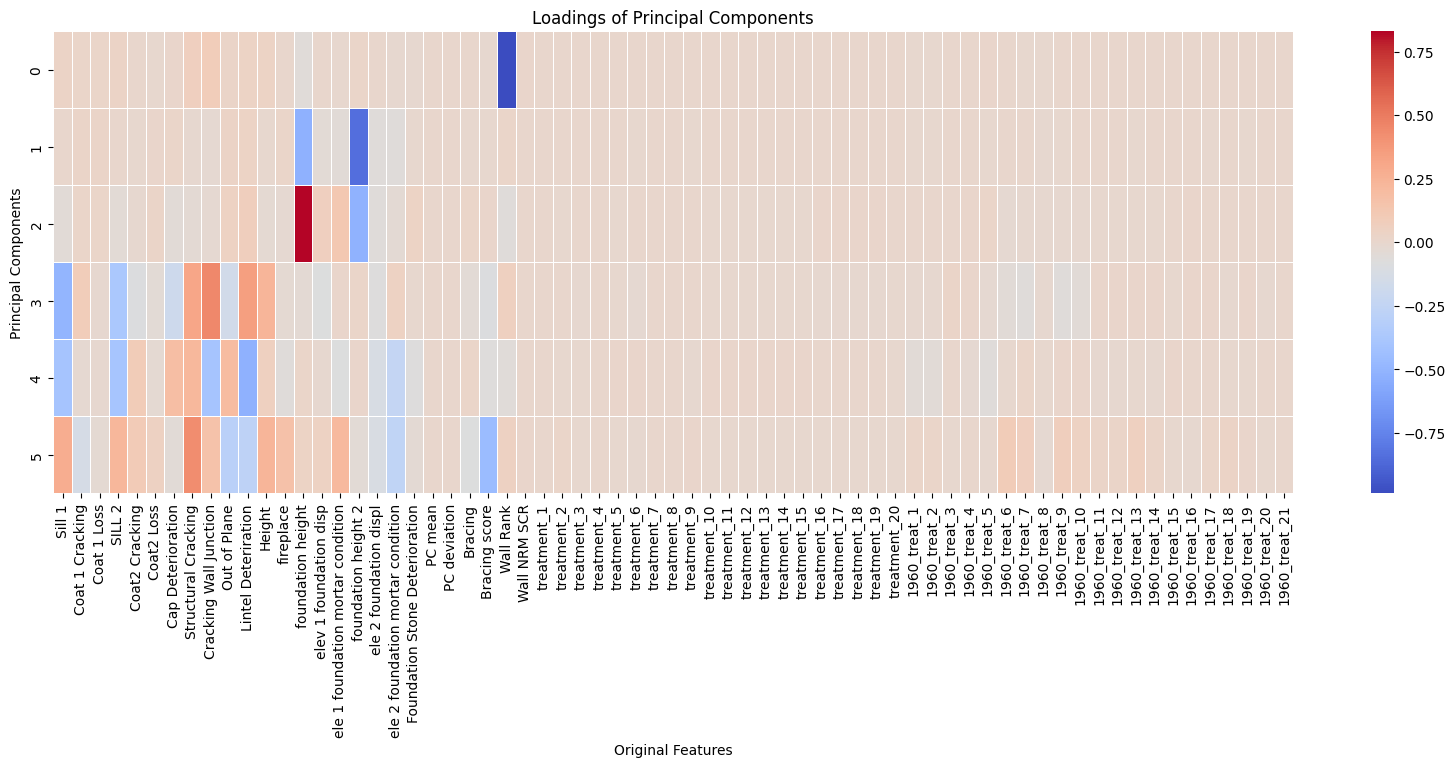

In [ ]:
# Assuming 'data' is your DataFrame with numerical values
pca = PCA(n_components=6)  # Specify the number of components you want to keep based on where the plot tapers off above

# Fit PCA on your data (assuming 'data' is your DataFrame)
pca.fit(df)

# Access the loadings (components)
components = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(components, columns=df.columns)

# Create a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(loadings_df, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Loadings of Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

Alright so what are my components?

* component 0 is wall rank
* component 1 is combination of foundation height1 and 2
* component 2 is combination of foundation height1 and 2
* component 3 is mostly cracking at the wall junction but also the other darker colored ones

* etc

interesting to see bracing score comes into play on component 5 along with structural cracking


okay but all this really tells us is that the wall rank score is the most important factor... so we should probably look at this without those dependent scores

In [ ]:
# List of column names to drop
columns_to_drop = ['Wall Rank', 'Wall NRM SCR']  # Replace with the actual column names you want to drop

# Remove the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop, axis=1)

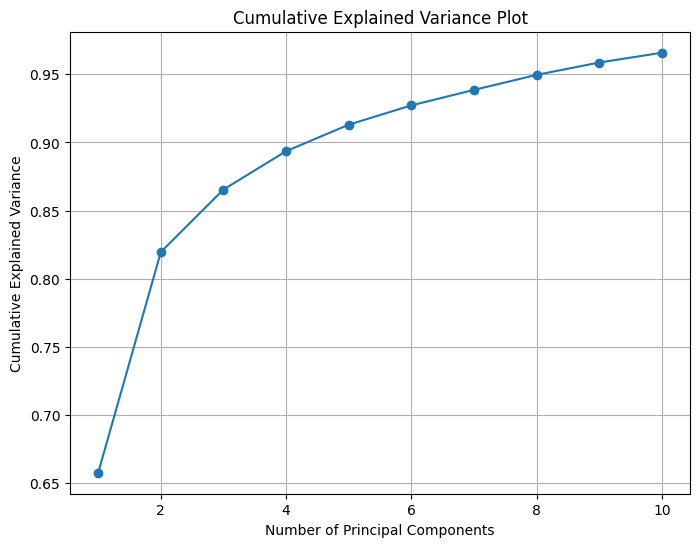

In [ ]:

# Create an instance of the PCA class and specify the number of principal components you want to keep
pca = PCA(n_components=10)  # Retain 10 principal components

# Fit the PCA model to your data and transform the data into a reduced-dimensional space
components = pca.fit_transform(df)  # 'components' now contains the reduced-dimensional data

# Calculate the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Create a plot to visualize the cumulative explained variance
import matplotlib.pyplot as plt  # Import the plotting library
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
# Plot the cumulative explained variance, x-axis: number of components, y-axis: cumulative explained variance
plt.xlabel('Number of Principal Components')  # Label for x-axis
plt.ylabel('Cumulative Explained Variance')  # Label for y-axis
plt.title('Cumulative Explained Variance Plot')  # Title of the plot
plt.grid(True)  # Display gridlines
plt.show()  # Show the plot


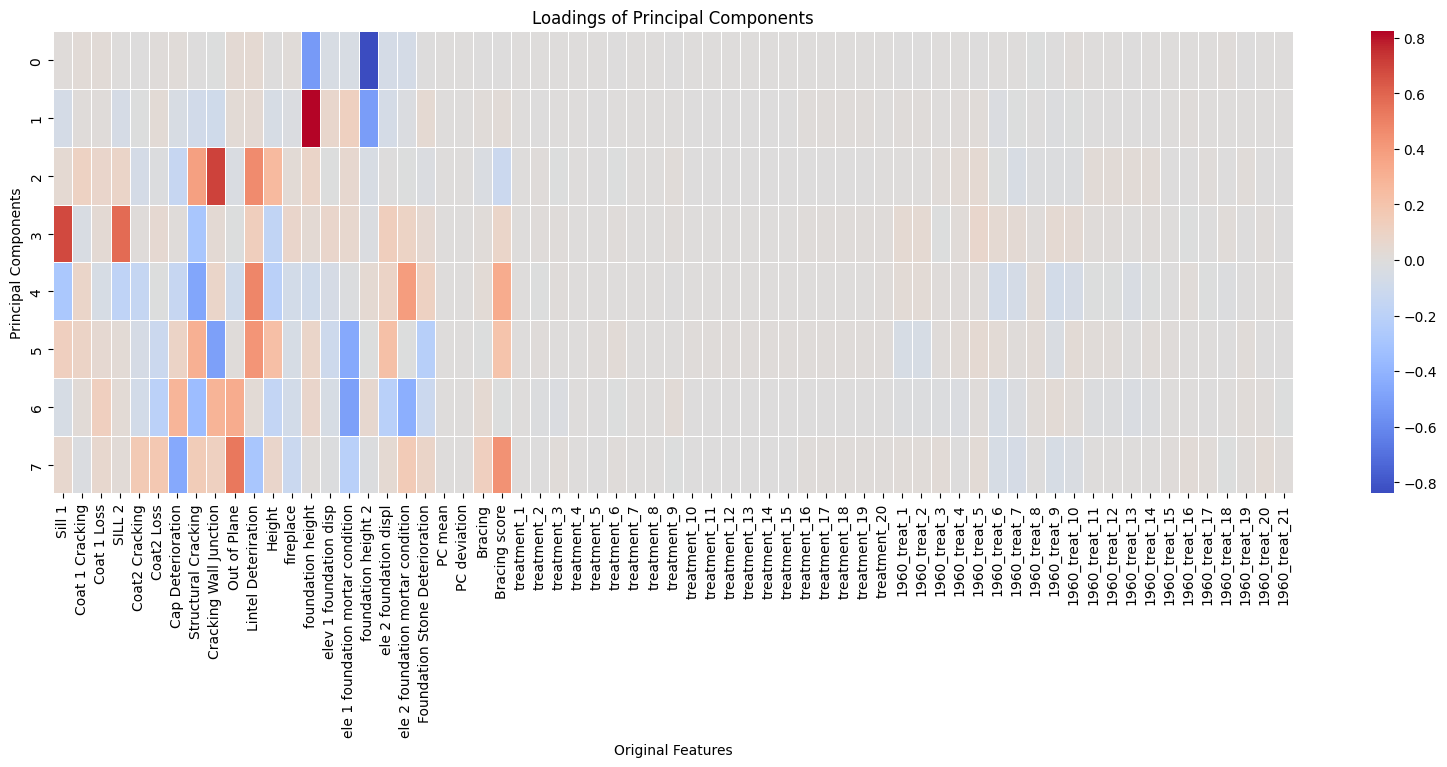

In [ ]:
# Assuming 'data' is your DataFrame with numerical values
pca = PCA(n_components=8)  # Specify the number of components you want to keep based on where the plot tapers off above

# Fit PCA on your data (assuming 'data' is your DataFrame)
pca.fit(df)

# Access the loadings (components)
components = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(components, columns=df.columns)

# Create a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(loadings_df, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Loadings of Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

what other ways can i look at this data? well we could do a feature importance on wall rank

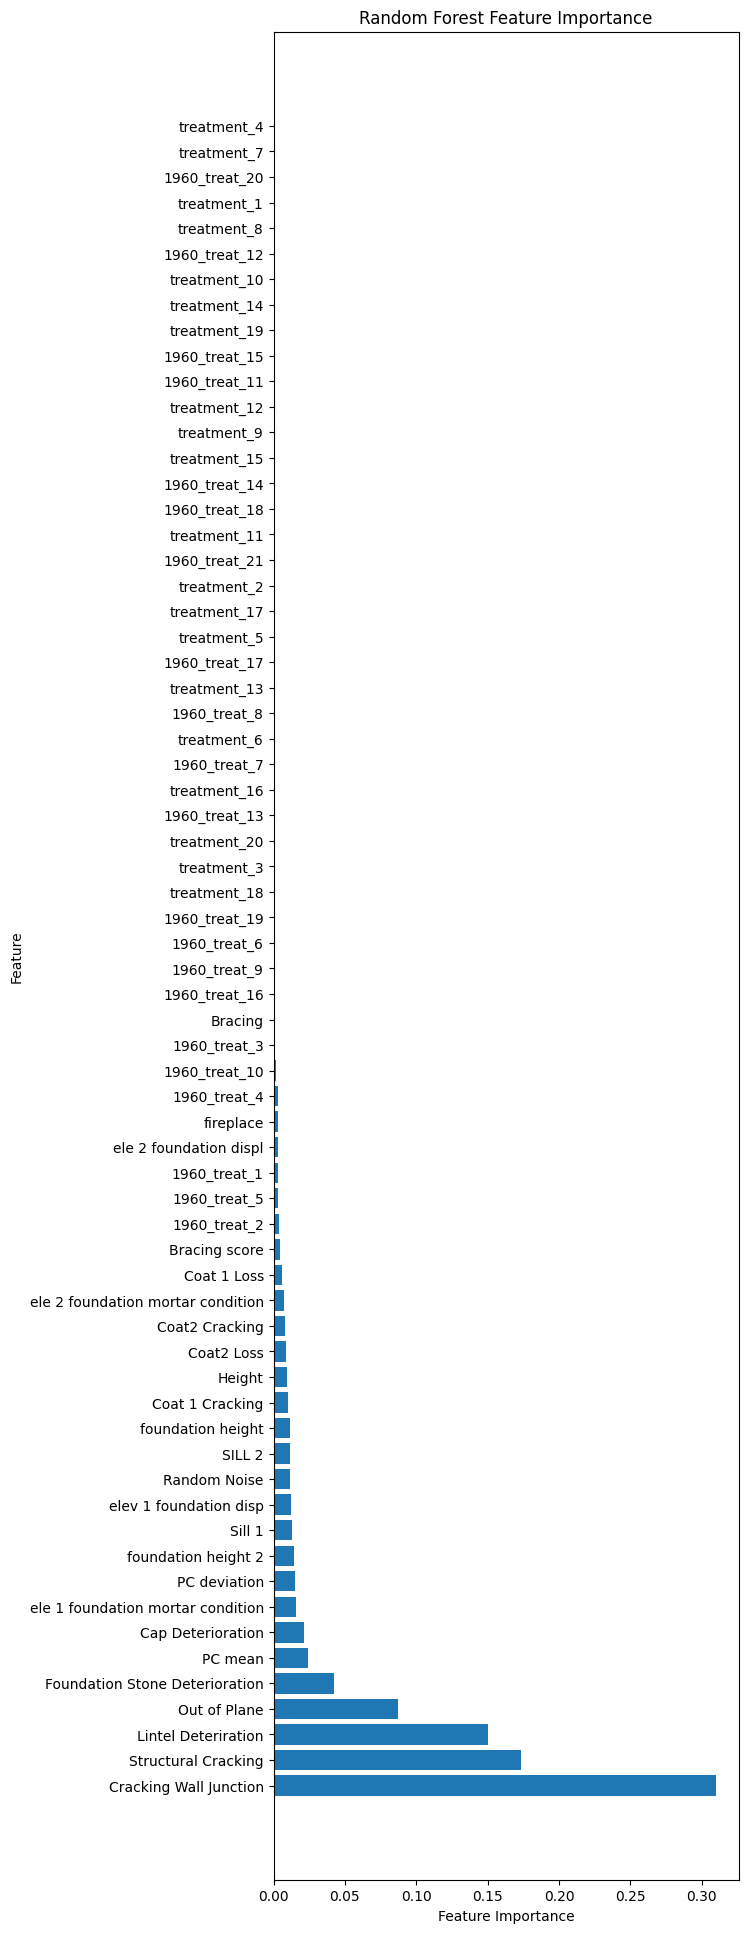

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset (replace 'data.csv' with your data file)
data = pd.read_csv('output.csv')

# Remove the first 10 columns (assuming you want to keep columns 11 and onwards)
data = data.iloc[:, 10:]

# List of column names to drop
columns_to_drop = ['Wall NRM SCR']  # Replace with the actual column names you want to drop

# Remove the specified columns from the DataFrame
data = data.drop(columns=columns_to_drop, axis=1)

# Define the features (X) and the target variable (y)
X = data.drop(['Wall Rank'], axis=1)  # Exclude the target column
y = data['Wall Rank']

# Add a random feature with random values
np.random.seed(42)  # For reproducibility
X['Random Noise'] = np.random.rand(len(X))

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(6, 24))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


you can treat anything greater than random noise as significant so those are the features that are significantly related to wall rank